# EDA and Regression Diagnostics — Predict Temperature from global_radiation

This notebook loads a CSV from the notebook's directory (columns: `global_radiation`, `temperature`) and performs:
- Scatter plot to check linear relationship (optional best-fit line)
- Fit a linear regression model (temperature ~ global_radiation)
- Actual vs Predicted plot
- Residuals vs Fitted values (check homoscedasticity)
- Histogram of residuals with overlaid normal curve (check normality)
- Q-Q plot of residuals
- A final interpretation cell

Instructions: place your CSV file in the same directory as this notebook. When prompted, type the file name (e.g., `data.csv`) or press Enter to use `data.csv` by default.

In [3]:
# Imports and utility functions
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats

sns.set(style='whitegrid', context='notebook')

def ensure_columns(df, required):
        """Ensure dataframe contains required columns (case-insensitive matching)."""
        cols_lower = {c.lower(): c for c in df.columns}
        mapping = {}
        for req in required:
            if req in df.columns:
                mapping[req] = req
            elif req.lower() in cols_lower:
                mapping[req] = cols_lower[req.lower()]
            else:
                raise KeyError(f"Required column '{req}' not found in CSV. Available columns: {list(df.columns)}")
        return mapping


In [4]:
# Load dataset (prompt user for filename)
default_file = r"https://github.com/LuckyBoy587/Statistical-Methods/raw/refs/heads/main/data/ML374_S6_Concept_Weather_Cleaned_Data.xlsx"
df = pd.read_excel(default_file)
print(f"Loaded {default_file} with shape {df.shape}")
df_head = df.head()
display(df_head)

# Check required columns and normalize names
col_map = ensure_columns(df, ['global_radiation', 'temperature'])
gcol = col_map['global_radiation']
tcol = col_map['temperature']

# Keep only the required columns to simplify
df = df[[gcol, tcol]].rename(columns={gcol: 'global_radiation', tcol: 'temperature'})

# Basic cleaning: drop rows where either value is NA
initial_n = len(df)
df = df.dropna(subset=['global_radiation', 'temperature']).reset_index(drop=True)
print(f"Dropped {initial_n - len(df)} rows with missing values. Remaining rows: {len(df)}")


Loaded https://github.com/LuckyBoy587/Statistical-Methods/raw/refs/heads/main/data/ML374_S6_Concept_Weather_Cleaned_Data.xlsx with shape (3654, 2)


,global_radiation,temperature
0,-1.208678,-1.095641
1,-1.155215,-1.001222
2,-0.887898,-1.190060
3,-0.748894,-0.960756
4,-0.877206,-0.677498


Dropped 0 rows with missing values. Remaining rows: 3654


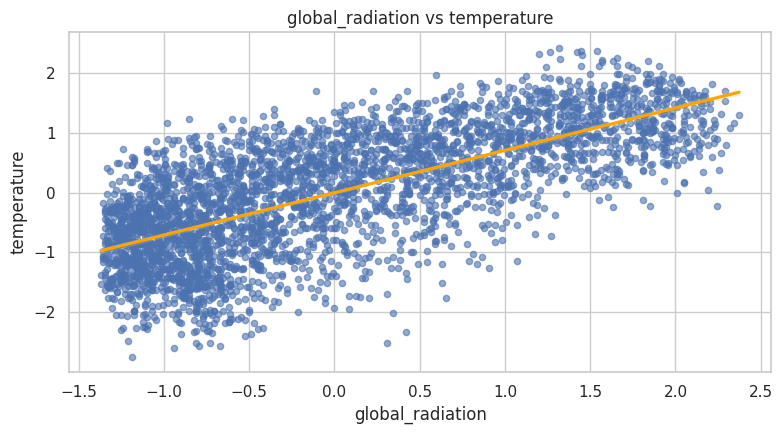

In [5]:
# 1) Scatter plot to check linearity. Optionally add line of best fit
show_fit = True  # change to False if you don't want the line-of-best-fit on this scatter

plt.figure(figsize=(8,4.5))
if show_fit:
        sns.regplot(x='global_radiation', y='temperature', data=df, scatter_kws={'s':20, 'alpha':0.6}, line_kws={'color':'orange'})
else:
        plt.scatter(df['global_radiation'], df['temperature'], s=20, alpha=0.6)

plt.xlabel('global_radiation')
plt.ylabel('temperature')
plt.title('global_radiation vs temperature')
plt.tight_layout()
plt.show()


In [6]:
# 2) Fit a linear regression model: temperature = beta0 + beta1 * global_radiation
X = df[['global_radiation']].values
y = df['temperature'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

coef = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

print(f"Linear model: temperature = {intercept:.4f} + {coef:.4f} * global_radiation")
print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Linear model: temperature = -0.0000 + 0.7084 * global_radiation
R^2: 0.5018
RMSE: 0.7058
MAE: 0.5728


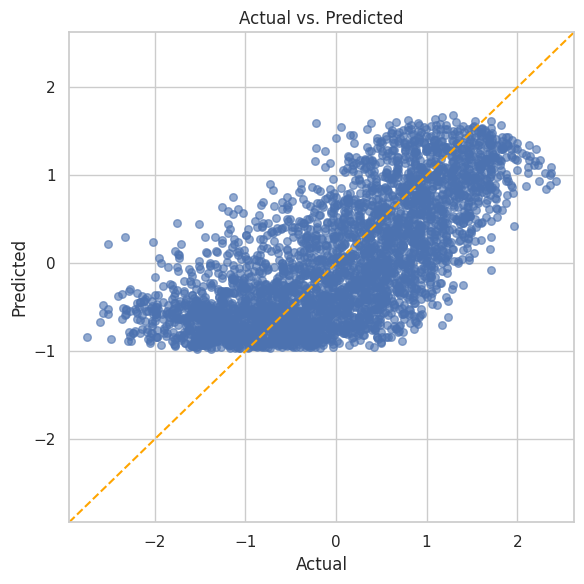

In [7]:
# 3) Actual vs Predicted plot
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.6, s=30)
lims = [min(y.min(), y_pred.min()) - 0.2, max(y.max(), y_pred.max()) + 0.2]
plt.plot(lims, lims, '--', color='orange')  # 45-degree line
plt.xlim(lims)
plt.ylim(lims)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.tight_layout()
plt.show()


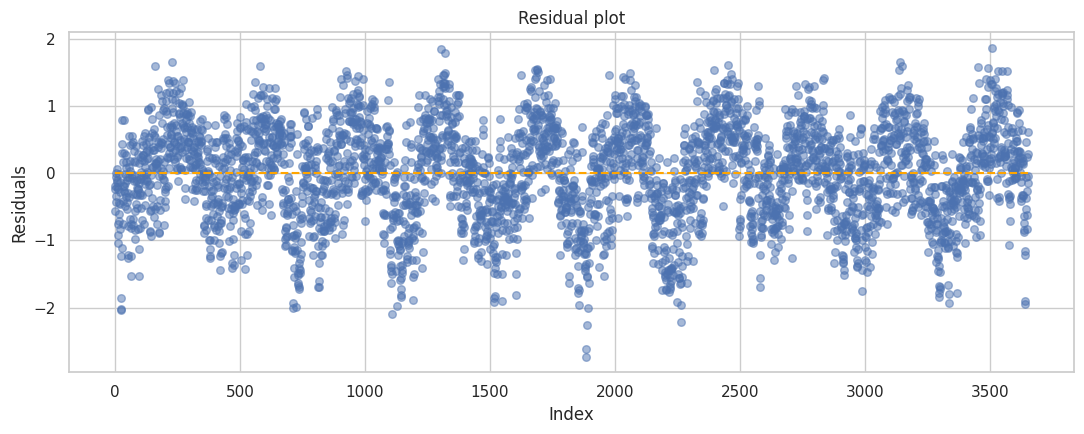

In [8]:
# 4) Residuals vs Fitted values -> check homoscedasticity
plt.figure(figsize=(11,4.5))
plt.scatter(range(len(residuals)), residuals, alpha=0.5, s=30)
plt.hlines(0, 0, len(residuals)-1, colors='orange', linestyles='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.tight_layout()
plt.show()


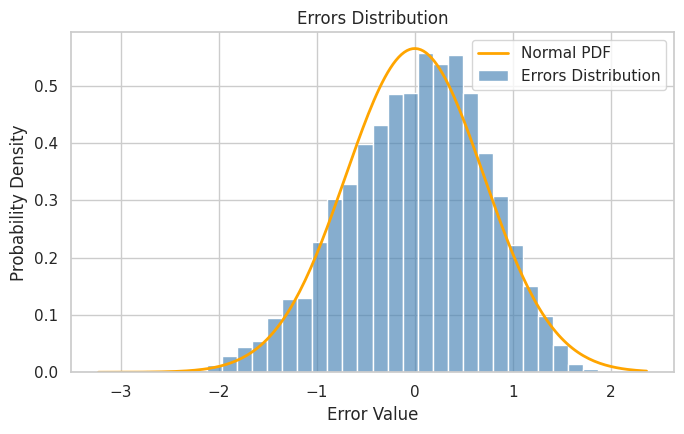

In [9]:
# 5) Histogram of residuals with a normal curve overlay
plt.figure(figsize=(7,4.5))
sns.histplot(residuals, kde=False, stat='density', bins=30, color='steelblue', alpha=0.65, label='Errors Distribution')
# overlay normal
mu, sigma = residuals.mean(), residuals.std()
x = np.linspace(residuals.min()-0.5, residuals.max()+0.5, 200)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='orange', lw=2, label='Normal PDF')
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Errors Distribution')
plt.legend()
plt.tight_layout()
plt.show()


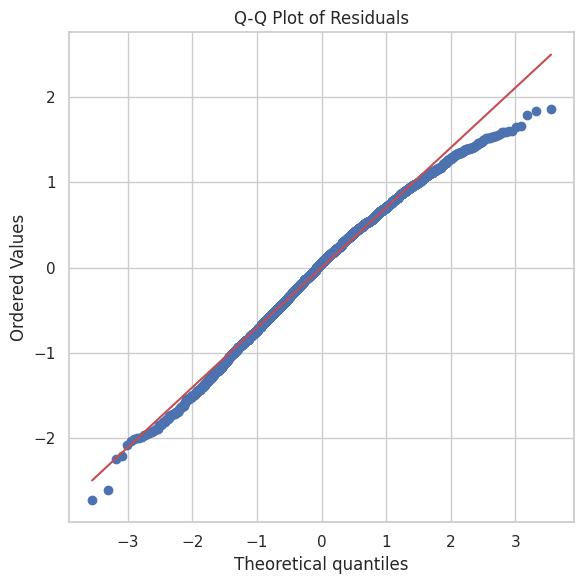

In [10]:
# 6) Q-Q plot (quantile-quantile) of residuals
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()


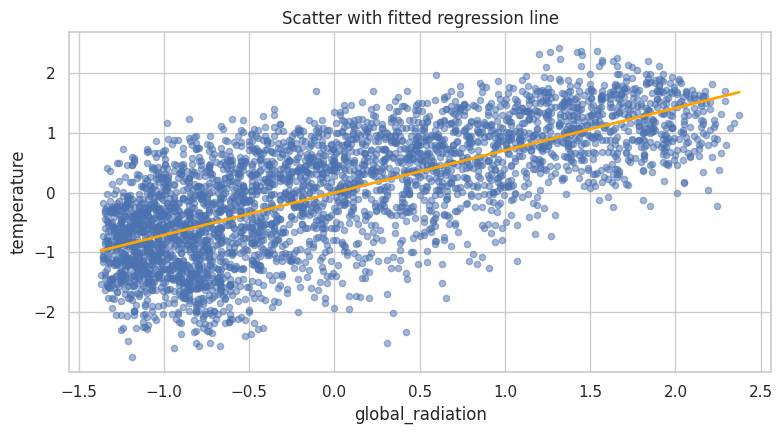

In [11]:
# 7) Scatter of original data with regression line superimposed
plt.figure(figsize=(8,4.5))
plt.scatter(df['global_radiation'], df['temperature'], s=20, alpha=0.5)
x_line = np.linspace(df['global_radiation'].min(), df['global_radiation'].max(), 200)
y_line = intercept + coef * x_line
plt.plot(x_line, y_line, color='orange', lw=2)
plt.xlabel('global_radiation')
plt.ylabel('temperature')
plt.title('Scatter with fitted regression line')
plt.tight_layout()
plt.show()


## Interpretation

- The fitted linear model is: temperature = intercept + coef * global_radiation (see printed values above).
- R^2 describes the proportion of variance in temperature explained by global_radiation. A higher R^2 (closer to 1) indicates a stronger linear association.
- The Actual vs Predicted plot shows how well predicted values match observed ones. Points close to the 45-degree line indicate good predictions.
- The Residuals vs Fitted plot checks homoscedasticity: if residuals are spread evenly across fitted values (no clear funnel/structure), the homoscedasticity assumption is more plausible. If you see a funnel shape (increasing spread) or strong patterns, heteroscedasticity may be present.
- The histogram + overlaid normal curve and the Q-Q plot check residual normality. Residuals roughly following the normal curve and points near the diagonal in the Q-Q plot suggest approximate normality. Large systematic deviations (heavy tails or skew) indicate departures from normality.

Notes and recommended next steps:
- If residuals show non-constant variance, consider transforming variables (e.g., log, Box-Cox) or using weighted least squares.
- If residuals are non-normal (heavy tails), consider robust regression methods or examining outliers/influential points.
- If the linear fit is poor (low R^2 or systematic pattern), consider adding predictors, using polynomial terms, or using non-linear models.

You can modify the `show_fit` variable earlier to hide/show the regression line on the first scatter, or change the filename to run on a different file.